#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. 

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [12]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

Note: you may need to restart the kernel to use updated packages.


In [13]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [14]:
import wget
#url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root'
#download=wget.download(url)
!move B2HHH_MagnetUp.root ./LHCb_Data/B2HHH_MagnetUp.root
!move B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root
# If we ALL do this too often, CERN will block our IP address....

The system cannot find the file specified.
The system cannot find the file specified.


In [15]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("LHCb_Data/B2HHH_MagnetDown.root")
#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [16]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [17]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

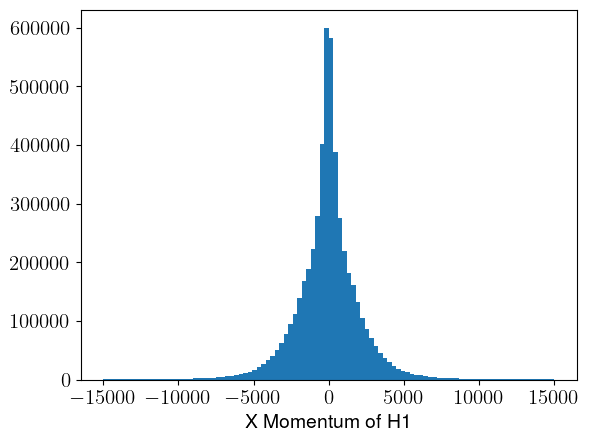

In [18]:
#lets plot something!
import matplotlib.pylab as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family" : 'Helvetica',
    "font.size" : 15
})

# make a place to plot something
plt.figure()
plt.hist (data, bins=100, range=(-15000,15000))
plt.xlabel('X Momentum of H1', fontsize=14)
plt.show()


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

**In this next block of code, we define the variables H1_P, H2_P, H3_P as a list of (3-component) vectors containing the momentum information of their respective daughter particles. We then take the norm of each of these vectors and store it in H1_Ptot, etc... The argument axis=1 is required to ensure the np.linalg.norm function is not applied to the whole list at once, but to each element of the list separately.**

- $\verb|Ptot| = |\vec p| = \sqrt{p_x^2 + p_y^2 + p_z^2}$

**We finally make a histogram of these total momenta for each daughter particle.**

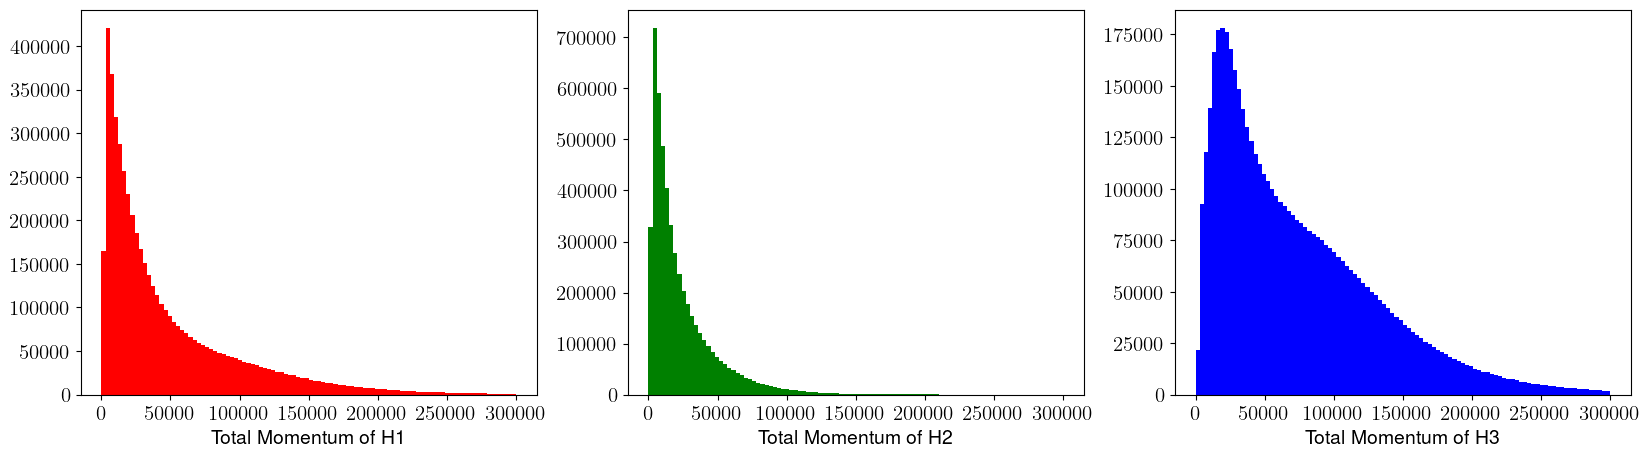

In [19]:
Events=f['DecayTree']


H1_P = np.array([Events['H1_PX'], Events['H1_PY'], Events['H1_PZ']]).T     # transposing (.T) flips the list so that each element of H1_P is the momentum of a particle with 3 (x,y,z) components
H2_P = np.array([Events['H2_PX'], Events['H2_PY'], Events['H2_PZ']]).T
H3_P = np.array([Events['H3_PX'], Events['H3_PY'], Events['H3_PZ']]).T


H1_Ptot = np.linalg.norm(H1_P, axis=1)
H2_Ptot = np.linalg.norm(H2_P, axis=1)
H3_Ptot = np.linalg.norm(H3_P, axis=1)


plt.subplots(1, 3, figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.hist (H1_Ptot, bins=100, range=(0,3e5), color='red')
plt.xlabel('Total Momentum of H1', fontsize=14)

plt.subplot(1, 3, 2)
plt.hist (H2_Ptot, bins=100, range=(0,3e5), color='green')
plt.xlabel('Total Momentum of H2', fontsize=14)

plt.subplot(1, 3, 3)
plt.hist (H3_Ptot, bins=100,  range=(0,3e5), color='blue')
plt.xlabel('Total Momentum of H3', fontsize=14)

plt.show()

In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

**Due to conservation of momentum, the momentum of the mother particle is known to be the sum of all 3 daughter particles' (vector) momenta.**
**B_Ptot is defined and plotted similarly as the daughter particles'.**

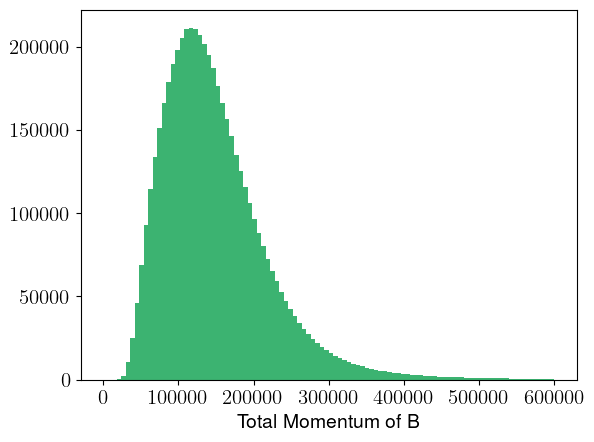

In [20]:
#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...

B_P = H1_P + H2_P + H3_P

B_Ptot = np.linalg.norm(B_P, axis=1)

plt.hist (B_Ptot, bins=100, range=(0,6e5), color='mediumseagreen')
plt.xlabel('Total Momentum of B', fontsize=14)
plt.show()

So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [21]:
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches=Events.arrays()
# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()

**The following code loops over every (key, item) pair of branches_dictionary, finds the longest key (by character count, yay monospaced fonts!) and pads the rest of the keys with spaces to that length.**

**It then prints the padded keys and the corresponding values line by line.**

In [22]:
# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")

maxlen = max([len(key) for key in branches_dictionary[45].keys()])          # just used for the print to look pretty (and better readability)

for branch, value in branches_dictionary[45].items():
    print (str(branch).ljust(maxlen, " "), value, sep=' : ')           # .ljust is for string padding

Event number #45
-------------------
B_FlightDistance : 257.00205776946603
B_VertexChi2     : 1.865567179221614
H1_PX            : 420.3413896413646
H1_PY            : -110.66276079201207
H1_PZ            : 5883.766388082404
H1_ProbK         : 0.012183159589767456
H1_ProbPi        : 0.8191394209861755
H1_Charge        : -1
H1_IPChi2        : 27121.53690741779
H1_isMuon        : 1
H2_PX            : -985.6367588987478
H2_PY            : 630.9893539299605
H2_PZ            : 35342.13861801284
H2_ProbK         : 0.6670113801956177
H2_ProbPi        : 0.04563945531845093
H2_Charge        : 1
H2_IPChi2        : 13712.438218214942
H2_isMuon        : 0
H3_PX            : -6242.300384410311
H3_PY            : -862.2130979651508
H3_PZ            : 277275.49225626234
H3_ProbK         : 0.07501816749572754
H3_ProbPi        : 0.428352952003479
H3_Charge        : 1
H3_IPChi2        : 1026.12298434195
H3_isMuon        : 0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

**Looking up the mass of the Kaon on Wikipedia (https://en.wikipedia.org/wiki/Kaon).**

**A small function is defined to find the energy of a particle given its total momentum and its mass.**

**Then, that function is applied to each of the daughter particles' data to find their energies.**

**Finally histograms of the resulting energies are plotted on 3 separate graphs.**

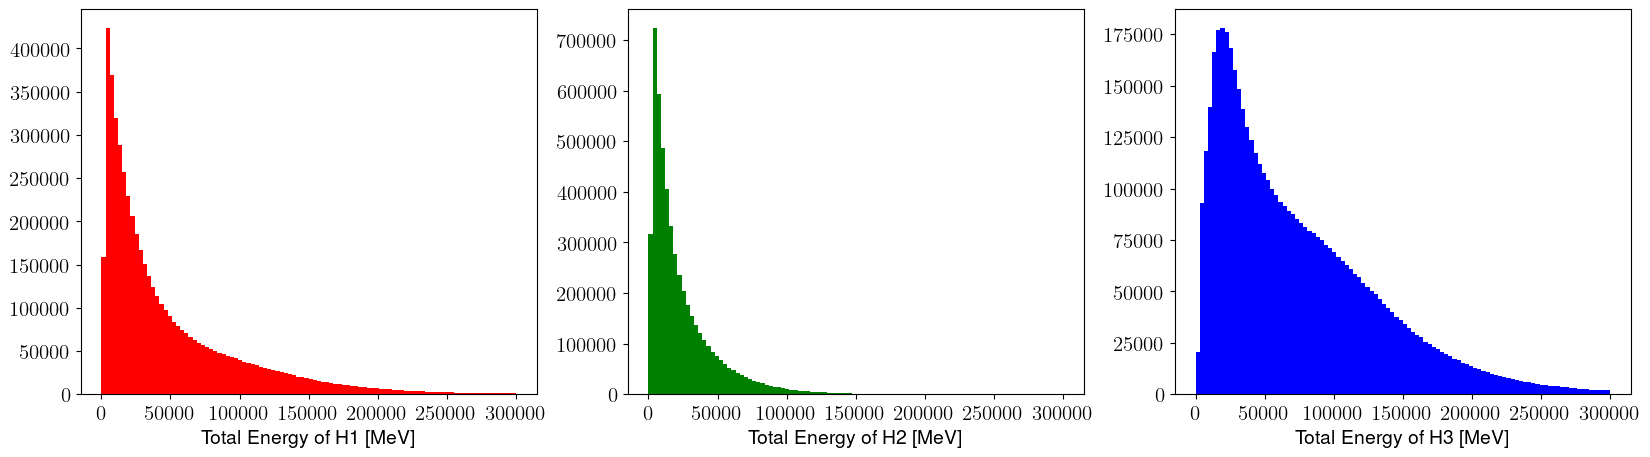

In [23]:
m_Kaon = 493.677 # MeV/c

def E(m, p):
    return (p**2 + m**2)**(1/2)

H1_E = E(m_Kaon, H1_Ptot)
H2_E = E(m_Kaon, H2_Ptot)
H3_E = E(m_Kaon, H3_Ptot)


plt.subplots(1, 3, figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.hist (H1_E, bins=100, range=(0,3e5), color='red')
plt.xlabel('Total Energy of H1 [MeV]', fontsize=14)

plt.subplot(1, 3, 2)
plt.hist (H2_E, bins=100, range=(0,3e5), color='green')
plt.xlabel('Total Energy of H2 [MeV]', fontsize=14)

plt.subplot(1, 3, 3)
plt.hist (H3_E, bins=100,  range=(0,3e5), color='blue')
plt.xlabel('Total Energy of H3 [MeV]', fontsize=14)

plt.show()

We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

**Knowing that energy is conserved allows us to compute the energy of the mother particles from the daughter particles' energy and write an expression for the mass of the mother particle in terms of that**
- $E_B = E_{H1} + E_{H2} + E_{H3}$
- $m_B^2 = E_B^2 - p_B^2$

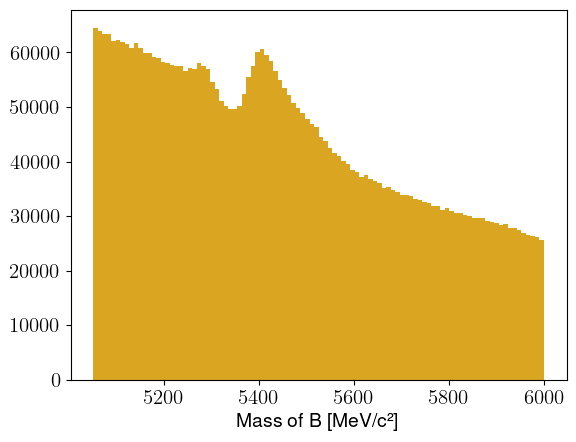

In [24]:
#Energy and momentum is conserved so we can find the quantities for B from her daughters
B_E = H1_E + H2_E + H3_E
B_m = (B_E**2 - B_Ptot**2)**(1/2)

#print(B_m)

#Now plot a histogram of the range of masses of the B meson.

plt.hist (B_m, bins=100, range=(5.05e3, 6e3), color='goldenrod')
plt.xlabel('Mass of B [MeV/c²]', fontsize=14)
plt.show()

# experimental mass is 5279.34 MeV/c²

**Looking at the graph, there seem to be a small and a large peak at around 5300MeV/c² (close to our theoretical $m_K$!) and 5400MeV/c² respectively**

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

**The function B_masses is defined. This function automates what was done in the previous parts.**

**That is, it takes a set of branches and returns a list of each mother particle's mass.**

**It does so by finding each of the daughter particles momenta, then their energies, then the energy and momentum of their mother particle, and finally its mass.**

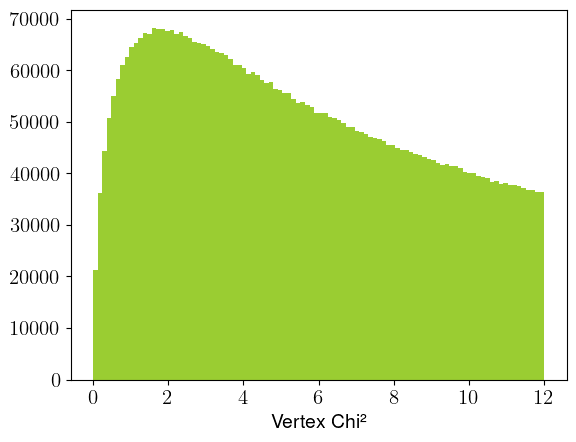

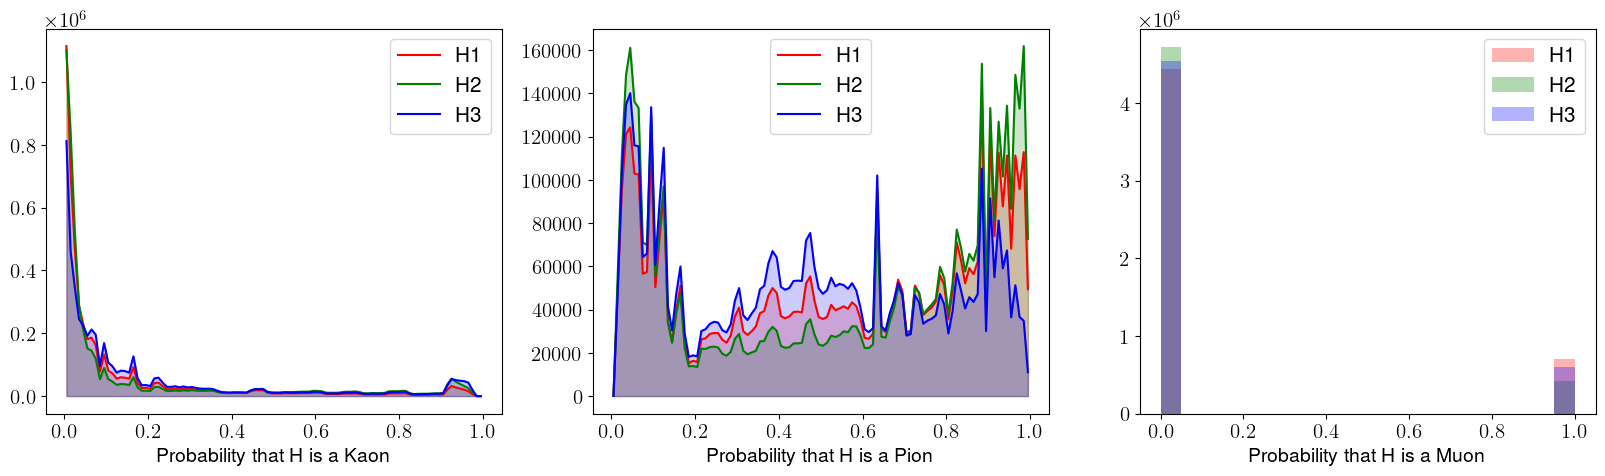

In [25]:
# Make plots of H1/H2/H3 _ProbK on one plot
# Make plots of H1/H2/H3 _ProbPi on one plot
# For all our particles, make a plot of the B_VertexChi2
# Plot any other variables from the list above you think would be handy to use in a selection...

def B_masses(b):
    """
    find H1, H2, H3 momenta
    find B momentum (cons. of momentum)
    determine H1, H2, H3 energies (from mass and momentum)
    determine B energy (cons. of energy)
    determine B mass from its momentum and energy
    """
    m_kaon = 493.677 # MeV/c

    H1_P = np.array([b['H1_PX'], b['H1_PY'], b['H1_PZ']]).T     # transposing (.T) flips the list so that each element is a momentum with 3 (x,y,z) components
    H2_P = np.array([b['H2_PX'], b['H2_PY'], b['H2_PZ']]).T
    H3_P = np.array([b['H3_PX'], b['H3_PY'], b['H3_PZ']]).T

    # Momentum of B meson is the sum of all 3 daughter particles' momenta
    B_P = H1_P + H2_P + H3_P                 # awkward arrays do element-wise operations like numpy arrays (in many cases)

    # Energy of B meson is the sum of all 3 daughter particles' energies
    B_E = np.sqrt(m_kaon**2 + np.linalg.norm(H1_P, axis=1)**2) + \
        np.sqrt(m_kaon**2 + np.linalg.norm(H2_P, axis=1)**2) + \
        np.sqrt(m_kaon**2 + np.linalg.norm(H3_P, axis=1)**2)

    B_m = np.sqrt(B_E**2 - np.linalg.norm(B_P, axis=1)**2)

    return B_m


def plotProbs(b, prob, bins=100, color='red', label=None):
    if label is None: label=prob
    bin_heights, bin_edges = np.histogram(b[prob], bins=bins, range=(0,1))

    x_data = (bin_edges[:-1] + bin_edges[1:]) / 2
    y_data = bin_heights
    plt.fill_between(x_data, y_data, 0, color=color, alpha=0.2)
    plt.plot(x_data, y_data, label=label, color=color)



plt.hist(branches['B_VertexChi2'], bins=100, color='yellowgreen')
plt.xlabel('Vertex Chi²', fontsize=14)

plt.subplots(1, 3, figsize=(20, 5))

plt.subplot(1, 3, 1)
plotProbs(branches, 'H1_ProbK', bins=100, label='H1', color='red')
plotProbs(branches, 'H2_ProbK', bins=100, label='H2', color='green')
plotProbs(branches, 'H3_ProbK', bins=100, label='H3', color='blue')
plt.xlabel('Probability that H is a Kaon', fontsize=14)
plt.legend()

plt.subplot(1, 3, 2)
plotProbs(branches, 'H1_ProbPi', bins=100, label='H1', color='red')
plotProbs(branches, 'H2_ProbPi', bins=100, label='H2', color='green')
plotProbs(branches, 'H3_ProbPi', bins=100, label='H3', color='blue')
plt.xlabel('Probability that H is a Pion', fontsize=14)
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(branches['H1_isMuon'], bins=20, label='H1', range=(0,1), color='red', alpha=0.3)
plt.hist(branches['H2_isMuon'], bins=20, label='H2', range=(0,1), color='green', alpha=0.3)
plt.hist(branches['H3_isMuon'], bins=20, label='H3', range=(0,1), color='blue', alpha=0.3)
plt.xlabel('Probability that H is a Muon', fontsize=14)
plt.legend()

plt.show()


**It would seem most particles are very likely to not be Kaons. This would explain that the largest peak was not around 5300MeV/c²**

Using these plots, we can now think about making a preselection. This has some format like the below:

In [26]:
# decided to use np.all from this stackoverflow entry
# https://stackoverflow.com/questions/8632033/how-to-perform-element-wise-boolean-operations-on-numpy-arrays
# np.all returns a list of bools (True if all listed conditions are met, False if not)
# decided to put it all in a function so i can also call it for MagnetUp

def gen_selection(b, pi_max, is_muon, kaon_min, chisq_max):
    # axis=0 ensures the condition is checked on each element of the first (0th) layer of the given arrays
    selection = np.all([b['B_VertexChi2']  < chisq_max,
                        
                        (b['H1_ProbPi'] < pi_max), 
                        (b['H1_ProbK']  > kaon_min), 
                        (b['H1_isMuon'] == is_muon),

                        (b['H2_ProbPi'] < pi_max), 
                        (b['H2_ProbK']  > kaon_min), 
                        (b['H2_isMuon'] == is_muon),

                        (b['H3_ProbPi'] < pi_max), 
                        (b['H3_ProbK']  > kaon_min), 
                        (b['H3_isMuon'] == is_muon)], axis=0)
    
    return selection


selection = gen_selection(branches, 
                          pi_max=0.9, 
                          is_muon=False, 
                          kaon_min=0.2, 
                          chisq_max=7)

print(len(branches))
print(sum(selection))       # prints how many values are True (equivalent to length of CutTree)

5135823
43838


**Even using a pretty indulgent filter (we reject a branch if all daughter particles have more than 90% probability of being pions, for example), only about 1% of the original data points are selected.**

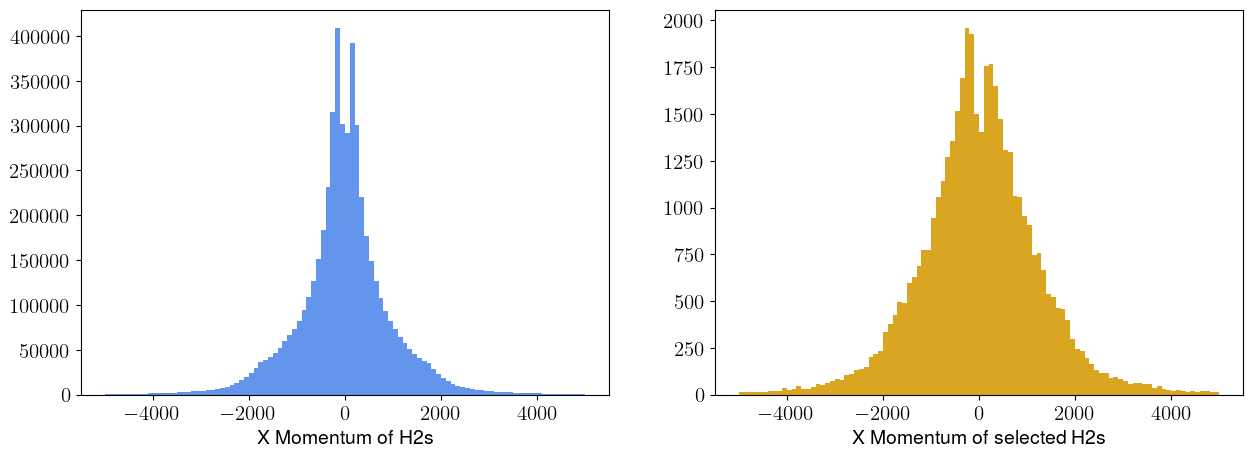

In [27]:
#To apply the selection - we can use the selection command after our instruction e.g.:
CutTree = branches[selection]

#probably we can make this more generic - try below if you like...
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

#Try plotting our H2_PX distribution with and without the selection and spot the differences...


plt.subplots(1, 2, figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist (branches['H2_PX'], bins=100, range=(-5e3, 5e3), color='cornflowerblue')
plt.xlabel('X Momentum of H2s', fontsize=14)
plt.subplot(1, 2, 2)
plt.hist (CutTree['H2_PX'], bins=100, range=(-5e3, 5e3), color='goldenrod')
plt.xlabel('X Momentum of selected H2s', fontsize=14)
plt.show()

**While the values of the X momentum don't seem to have substancially changed, we can notice that the bin heights are much, much lower (only attaining a max of ~2000 elements in a bin vs. ~400'000)**

5135823 43838


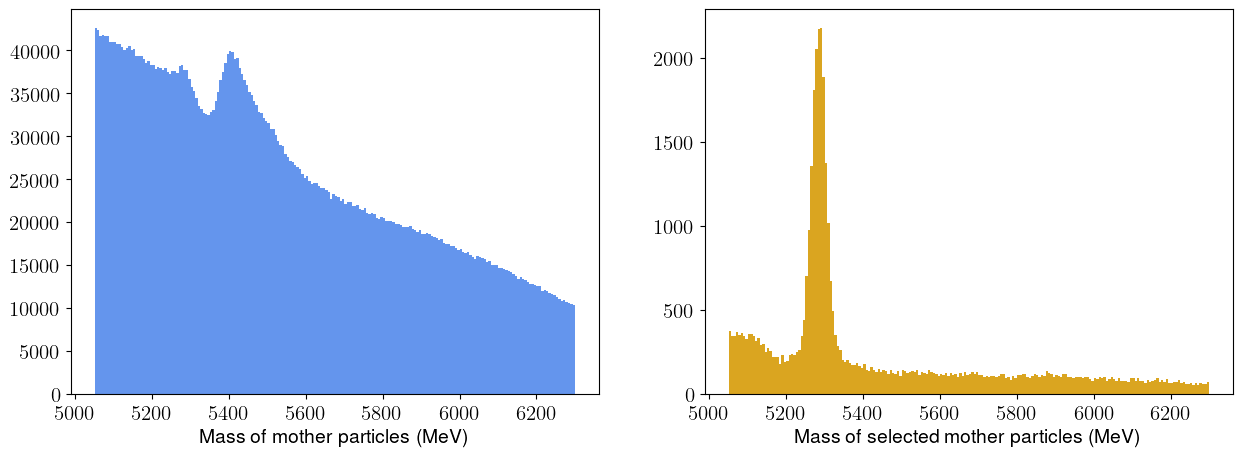

In [28]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the pre-cuts and the CutTree (post-cuts)
#What do you notice about your histogram now?
#You can also use len() to find the number of entries in each.

Cut_B_m = B_m[selection]            # I was going to recalculate every mass from the cut data, but Natalia did this and it made much more sense

plt.subplots(1, 2, figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist (B_m, bins=200, color='cornflowerblue')
plt.xlabel('Mass of mother particles (MeV)', fontsize=14)
plt.subplot(1, 2, 2)
plt.hist (Cut_B_m, bins=200, color='goldenrod')
plt.xlabel('Mass of selected mother particles (MeV)', fontsize=14)

print(len(B_m), len(Cut_B_m))

**We notice a much clearer peak at the 5300MeV/c² mark, right where our Kaons should be, which means our filtering worked!**

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

**3 model functions are defined ($\verb|gauss|, \verb|exponential|, \verb|exp_gauss|$), each with their parameters.**

**Then, $\verb|fit|$ is defined. $\verb|fit|$ generates a histogram of a given list of values and number of bins, and executes a curve fitting algorithm ($\verb|curve_fit|$ from scipy) on it, given a model function, an initial guess. It then returns a dictionary containing all the important information about the curve fitting**

**The resulting dictionary can then be passed to $\verb|plotResult|$, along with the original data and some labels for easy plotting.**

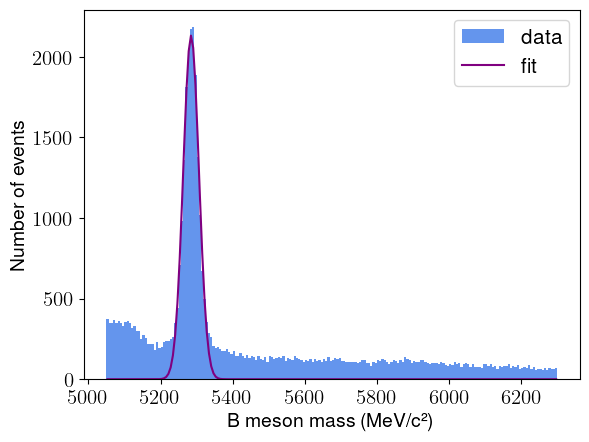

In [29]:
# Grab another package
from scipy import stats
from scipy.optimize import curve_fit

def gauss (x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2 / (2 * sigma**2))

def exponential(x, *p):
    C, D = p
    return C * np.exp(D*x)
    
def exp_gauss(x, *p):
    A, mu, sigma, e_loc, e_scale = p
    return gauss(x, A, mu, sigma) + exponential(x, e_loc, e_scale)

def fit(values, model, p0, nbins, label='data'):
    MIN, MAX = min(values), max(values)
    bin_height, bin_edge, _ = plt.hist(values, bins=nbins, range=(MIN, MAX), label=label)
    x_data = (bin_edge[:-1] + bin_edge[1:])/2
    y_data = bin_height
    opt_params, pcov = curve_fit(model, x_data, y_data, p0=p0)
    plt.close()
    return {'MIN':MIN, 'MAX':MAX, 'x_data':x_data, 'y_data':y_data, 'opt_params':opt_params, 'pcov':pcov, 'nbins':nbins, 'model':model}



def plotResult(x, result, data_label='data', fit_label='fit'):
    result_y_fit = result['model'](result['x_data'], *result['opt_params'])
    plt.hist(x, bins=200, range=(result['MIN'], result['MAX']), label=data_label, color='cornflowerblue')
    plt.plot(result['x_data'], result_y_fit, label=fit_label, color='purple')
    plt.xlabel("B meson mass (MeV/c²)", fontsize=14)
    plt.ylabel("Number of events", fontsize=14)
    plt.legend()


# all the results are stored in results with descriptive names (yay dicionaries!)
results = {}

results['cut gauss'] = fit(values=Cut_B_m, 
                            model=gauss, 
                            p0=[1000, 5000, 100], 
                            nbins=200)



y_fit = gauss(results['cut gauss']['x_data'], *results['cut gauss']['opt_params'])


plotResult(Cut_B_m, result=results['cut gauss'])

The fitted parameters are:
A	1999.462182426964
mu	5284.898401328776
sigma	18.240516996363613
C	565879.9110108138
D	-0.0014827668748032701


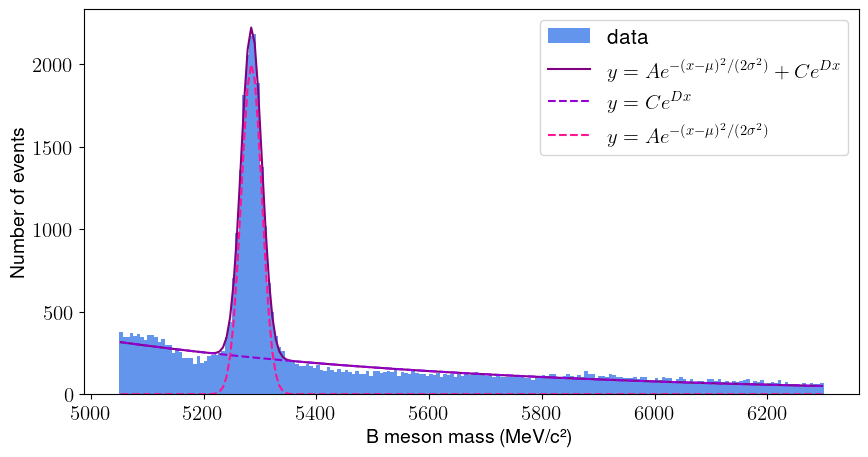

In [30]:
# Explore optimisedParameters - what does it contain? 
# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background 
# which has an exponential shape - and we want to make a combined model to fit which contains both
# the gauss and the exponential...


results['cut exp+gauss'] = fit(values=Cut_B_m, 
                            model=exp_gauss,
                            p0=[1500, 5500, 1000, 1000, -0.0001], 
                            nbins=200, 
                            label='B mass')

ceg = results['cut exp+gauss']

print('The fitted parameters are:')
for name, value in zip(['A', 'mu', 'sigma', 'C', 'D'], ceg['opt_params']):
    print(name, value, sep='\t')


y_model_fit = exp_gauss(ceg['x_data'], *ceg['opt_params'])
y_exp_fit = exponential(ceg['x_data'], *(ceg['opt_params'][-2:]))
y_gauss_fit = gauss(ceg['x_data'], *(ceg['opt_params'][:-2]))


plt.figure(figsize=(10, 5))

plt.hist(Cut_B_m, bins=200, range=(ceg['MIN'], ceg['MAX']), label = "data", color='cornflowerblue')
plt.plot(ceg['x_data'], y_model_fit, label=r'$y=Ae^{-(x-\mu)^2/(2\sigma^2)} + Ce^{Dx}$', color='purple')
plt.plot(ceg['x_data'], y_exp_fit, label=r'$y=Ce^{Dx}$', linestyle='dashed', color='darkviolet')
plt.plot(ceg['x_data'], y_gauss_fit, label=r'$y=Ae^{-(x-\mu)^2/(2\sigma^2)}$', linestyle='dashed', color='deeppink')
plt.xlabel("B meson mass (MeV/c²)", fontsize=14)
plt.ylabel("Number of events", fontsize=14)
plt.legend()
plt.show()

**Adding an exponential decay to our model allows us to exclude some false positives (ie events that look like what we're after, but are actually just coincidences) and get a more accurate number of events.**

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

**$\verb|nEvents|$ returns the number of events $N$ (and its error $\sigma_N$) corresponding to a specific model fit.**
- For a bell curve model of the form: $y = a e^{-(x-\mu)/(2 \sigma^2)}$
- We get $N = a \sigma \sqrt{2 \pi} w$ where $w$ is the width of a bin
- and $\sigma_N = |N|\displaystyle\sqrt{\biggl(\frac{\sigma_a}{a}\biggr)^2 + \biggl(\frac{\sigma_\sigma}{\sigma}\biggr)^2}$

In [31]:
"""
the input to nEvents must have the same structure as the output of fit
that is, a dictionary containing all the necessary information about the curve fitting process
(it's also assumed that a gaussian was used in the model and that its parameters are the first 3 ones in result['opt_params'])

returns the number of events corresponding to the fitted bell curve and the error
"""
def nEvents(result):
    a, mu, sigma, *rest= result['opt_params']
    var_a = np.sqrt(result['pcov'][0,0])
    var_sigma = np.sqrt(result['pcov'][2,2])

    n_events = a * abs(sigma) * (2 * np.pi)**(1/2) * len(result['y_data']) / (result['MAX'] - result['MIN'])
    n_events_err = np.sqrt((var_a / a)**2 + (var_sigma / abs(sigma))**2) * n_events
    return n_events, n_events_err


N, err_N = nEvents(results['cut exp+gauss'])
print('The value of N is', N, '+-', err_N)

The value of N is 14632.313920530049 +- 168.82682842618283


# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

**We define the function $\verb|B_filter|$ which takes a list of branches and a string as arguments.**
- **If the string is 'plus', it returns all branches with a positive net charge (corresponding to the decay of a B+)**
- **If the string is 'minus' (or anything else), it returns all branches with a negative net charge (B-).**

The fitted parameters for B+ are:
A	939.2599743165495
mu	5286.044549701925
sigma	18.11231753240669
C	282148.6726769772
D	-0.001486113554033187

The fitted parameters for B- are:
A	1063.5551594659353
mu	5283.875284333507
sigma	18.288783157922236
C	283850.92612219014
D	-0.0014795514575356194


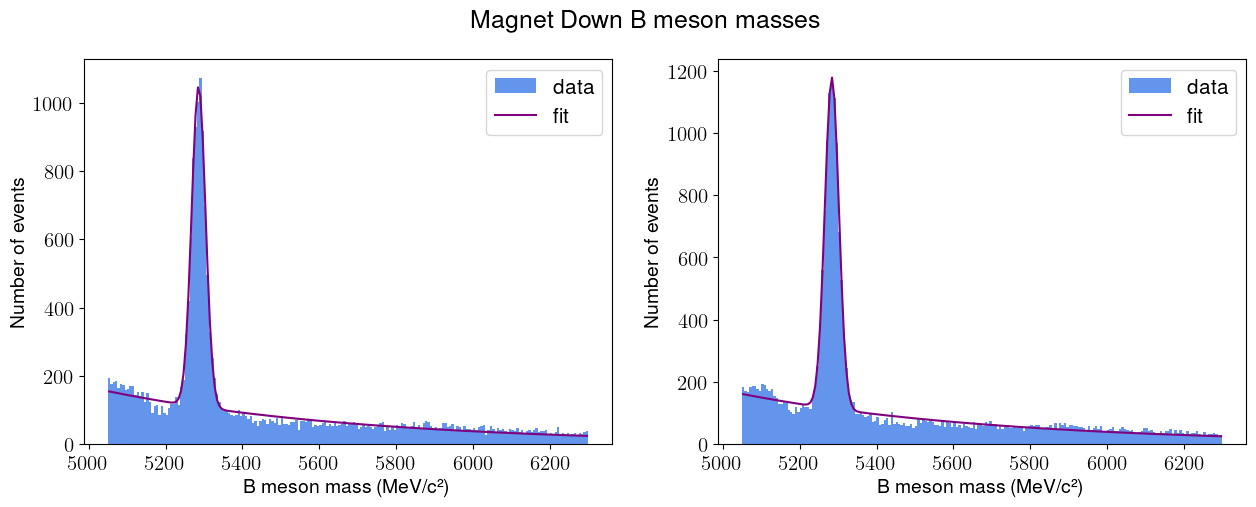

A_CP has a value of -0.0669286415154617 +- 0.008249094752669845


In [32]:
# we start with the filtered data already (because either way we would filter it later)
"""
Returns all branches in a list of branches which correspond to:
    a B+ -> K+K+K-      if charge='plus'
    a B- -> K-K-K+      if charge='minus'
"""
def B_filter(b, charge):
    tot_charge = 1 if charge=='plus' else -1
    B_charge = b['H1_Charge'] + b['H2_Charge'] + b['H3_Charge']
    return b[B_charge == tot_charge]
     


Bminus_events = B_filter(CutTree,'minus')
Bplus_events = B_filter(CutTree,'plus')
Bminus_mass = B_masses(Bminus_events)
Bplus_mass = B_masses(Bplus_events)

# fit an exp+gauss model to the B- and B+ data separately
results['cut B-'] = fit(values=Bminus_mass, 
                        model=exp_gauss,
                        p0=[1500, 5500, 1000, 1000, -0.0001], 
                        nbins=200)

results['cut B+'] = fit(values=Bplus_mass, 
                        model=exp_gauss,
                        p0=[1500, 5500, 1000, 1000, -0.0001], 
                        nbins=200)



# just to make the code a little tidier
Bm = results['cut B-']
Bp = results['cut B+']


print('The fitted parameters for B+ are:')
for name, value in zip(['A', 'mu', 'sigma', 'C', 'D'], Bm['opt_params']):
    print(name, value, sep='\t')

print()

print('The fitted parameters for B- are:')
for name, value in zip(['A', 'mu', 'sigma', 'C', 'D'], Bp['opt_params']):
    print(name, value, sep='\t')


Bminus_y_fit = exp_gauss(Bm['x_data'], *Bm['opt_params'])
Bplus_y_fit = exp_gauss(Bp['x_data'], *Bp['opt_params'])


plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle('Magnet Down B meson masses') 
plt.subplot(1, 2, 1)
plotResult(Bminus_mass, Bm)
plt.subplot(1, 2, 2)
plotResult(Bplus_mass, Bp)

plt.show()



n_Bminus, _ = nEvents(results['cut B-'])
n_Bplus, _ = nEvents(results['cut B+'])

A = (n_Bminus - n_Bplus) / (n_Bminus + n_Bplus)
sigma_A = np.sqrt((1 - A**2) / (n_Bminus + n_Bplus))

print('A_CP has a value of', A, '+-', sigma_A)

**$A_{CP}$ is about -7% indicating in this dataset, there were more B- than B+. However, this could be due to a quirk in the detector, as B- and B+ curve different directions (and are therefore detected in different parts of it).**

**To test how legitimate our result is, we can do the same data analysis for a dataset recorded with the magnet flipped. If our new $A_{CP}$ has a flipped sign, then it is likely due to the detector. If not, then this decay likely breaks CP-symmetry.**

In [33]:
# Doing the same for MagnetUp
f_up = uproot.open('LHCb_Data/B2HHH_MagnetUp.root')
branches_up = f_up['DecayTree'].arrays()
selection_up = gen_selection(branches_up, pi_max=0.8, is_muon=False, kaon_min=0.2, chisq_max=7)
cut_branches_up = branches_up[selection_up]
    

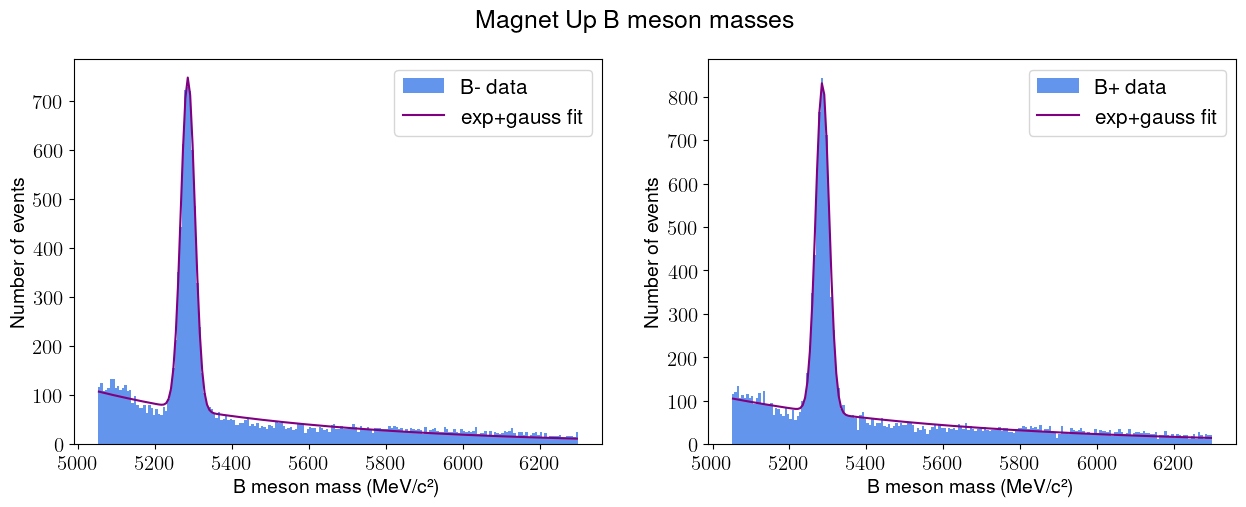

A= -0.043596802143255196 +- 0.009827932657042888


In [34]:
Bminus_up = B_filter(cut_branches_up, 'minus')
Bplus_up = B_filter(cut_branches_up, 'plus')

Bminus_m_up = B_masses(Bminus_up)
Bplus_m_up = B_masses(Bplus_up)

results['cut B- up'] = fit(values=Bminus_m_up, 
                            model=exp_gauss,
                            p0=[1500, 5500, 1000, 1000, -0.0001], 
                            nbins=200)


results['cut B+ up'] = fit(values=Bplus_m_up, 
                            model=exp_gauss,
                            p0=[1500, 5500, 1000, 1000, -0.0001], 
                            nbins=200)


plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle('Magnet Up B meson masses') 
plt.subplot(1, 2, 1)
plotResult(Bminus_m_up, results['cut B- up'], data_label='B- data', fit_label='exp+gauss fit')
plt.subplot(1, 2, 2)
plotResult(Bplus_m_up, results['cut B+ up'], data_label='B+ data', fit_label='exp+gauss fit')

plt.show()




n_Bminus_up, _ = nEvents(results['cut B- up'])
n_Bplus_up, _ = nEvents(results['cut B+ up'])

A_up = (n_Bminus_up - n_Bplus_up) / (n_Bminus_up + n_Bplus_up)
sigma_A_up = np.sqrt((1 - A_up**2) / (n_Bminus_up + n_Bplus_up))

print('A=', A_up, '+-', sigma_A_up)

**Although different, this value of $A_{CP}$ definitely has the same sign as the previous one. This means the B hadron to 3 Kaons decay likely breaks CP-symmetry! Great news!!**

# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


**The alignment of the LHCb collider can be seen in figure 23.1 of the [Overview of LHCb alignment](https://cds.cern.ch/record/1047122/files/p197.pdf)**

**The function $\verb|invrt_mass|$ does the following:**
- **the momentum $\vec p$ of every daughter particle is stored in $\verb|P|$ (such that $\verb|P[i]|$ -> list of momenta, $\verb|P[i,j]|$ -> momentum of one particle, $\verb|P[i,j,k]|$ -> component of that momentum)**
- **the transverse momentum $p_T$ (momentum in the plane perpendicular to the beam line) is computed for each daughter particle and stored in $\verb|PT|$. It's important to note that the $z$-axis is in line with the beam.**
    - $p_T = \sqrt{p_x^2 + p_y^2}$
- **the pseudorapidity $\eta$ of every particle is computed and stored in $\verb|eta|$**
    - $\displaystyle \eta = \tanh^{-1}\biggl(\frac{p_z}{|\vec p|}\biggr)$
- **the azimuthal angle $\phi$ of every particle is computed and stored in $\verb|phi|$**
    - $\displaystyle \phi = \tan^{-1}\biggl(\frac{p_y}{p_x}\biggr)$
- **then, from all these values, the square of the invariant masses $m_{1,3}^2$ and $m_{2,3}^2$ are computed and stored in $\verb|M13|$ and $\verb|M23|$ respectively**
    - $\displaystyle m_{i,j}^2 = 2p_{T,i}~ p_{T,j} \bigl(\cosh(\eta_i - \eta_j) - \cos(\phi_i - \phi_j)\bigr)$
- $\verb|M13|$ and $\verb|M23|$ are returned

**The formulae are stolen from the Wikipedia articles on [invariant mass](https://en.wikipedia.org/wiki/Invariant_mass#Example:_two-particle_collision) and on [pseudorapidity](https://en.wikipedia.org/wiki/Pseudorapidity)**

In [35]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)
"""
Given a list of branches, invrt_mass returns two lists,
corresponding to the invariant masses two possible pairs of opposite signed Kaons for each B meson.
"""
def invrt_mass(b):
    P = np.array([np.array([b['H1_PX'], b['H1_PY'], b['H1_PZ']]).T,
                  np.array([b['H2_PX'], b['H2_PY'], b['H2_PZ']]).T,
                  np.array([b['H3_PX'], b['H3_PY'], b['H3_PZ']]).T])
    
    PT = np.linalg.norm(P[:, :, 0:2], axis=2)
    eta = np.arctanh(P[:,:,2] / np.linalg.norm(P, axis=2))
    phi = np.arctan2(P[:,:,1], P[:,:,0])

    # we can see from this commented piece of code that H2 and H3 have like charges, and H1 carries the opposite charge
    #print(b['H1_Charge'], b['H2_Charge'], b['H3_Charge'], sep='\n')
    M12 = (2 * PT[0] * PT[1] * (np.cosh(eta[0] - eta[1]) - np.cos(phi[0] - phi[1])))
    M13 = (2 * PT[0] * PT[2] * (np.cosh(eta[0] - eta[2]) - np.cos(phi[0] - phi[2])))

    return M12, M13

**Then, we plot the data as a 2D histogram (on the left) and as a filled contour plot (on the right)**

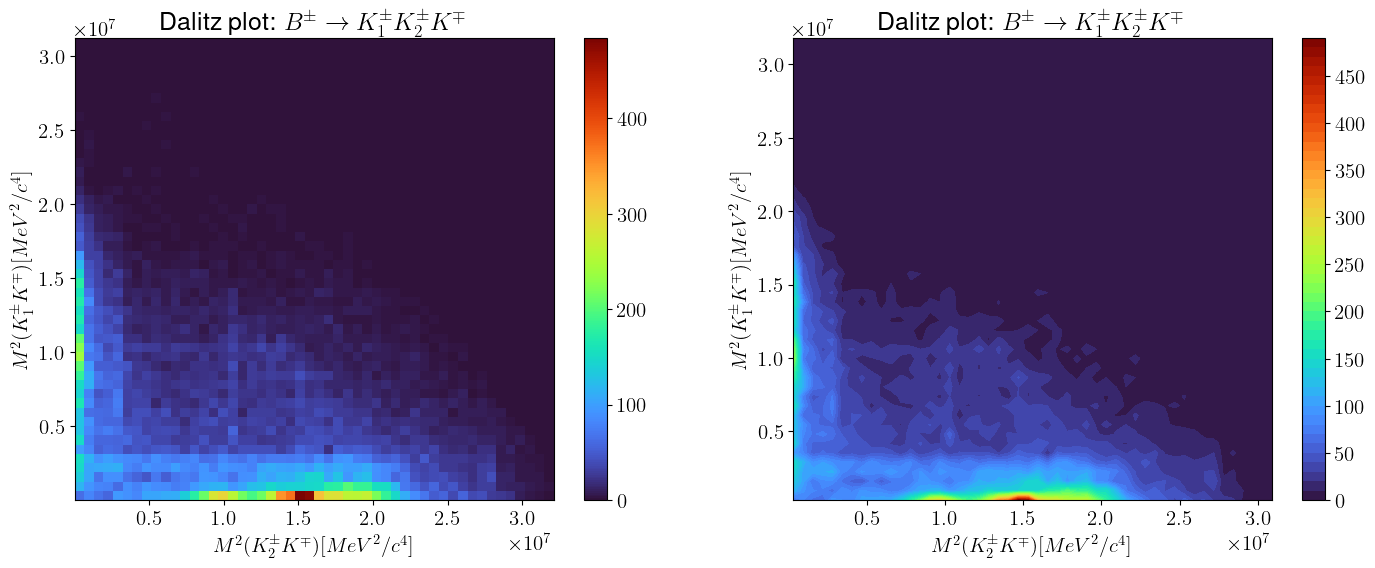

In [36]:
# Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
# Choose an appropriate binning in your plotting

Masses = invrt_mass(CutTree)


plt.subplots(1, 2, figsize=(17, 6))

# make a 2D histogram of the invariant masses 
plt.subplot(1, 2, 1)
h, xedges, yedges, _ =plt.hist2d(Masses[1], Masses[0], bins=50, cmap='turbo')
plt.title(r'Dalitz plot: $B^{\pm}\rightarrow K^{\pm}_1 K^{\pm}_2 K^{\mp}$')
plt.xlabel(r'$M^2(K^{\pm}_2 K^{\mp}) [{MeV}^2 / c^4]$')
plt.ylabel(r'$M^2(K^{\pm}_1 K^{\mp}) [{MeV}^2 / c^4]$')
plt.colorbar()

# make a contour plot of the resulting data
plt.subplot(1, 2, 2)
plt.contourf((yedges[:-1]+yedges[1:])/2, (xedges[:-1]+xedges[1:])/2, h.T, levels=50, cmap='turbo')
#plt.contour((yedges[:-1]+yedges[1:])/2, (xedges[:-1]+xedges[1:])/2, h.T, levels=50)
plt.title(r'Dalitz plot: $B^{\pm}\rightarrow K^{\pm}_1 K^{\pm}_2 K^{\mp}$')
plt.xlabel(r'$M^2(K^{\pm}_2 K^{\mp}) [{MeV}^2 / c^4]$')
plt.ylabel(r'$M^2(K^{\pm}_1 K^{\mp}) [{MeV}^2 / c^4]$')
plt.colorbar()

plt.show()

**This part only shows the contour of the Dalitz plot (it looks nicer)**

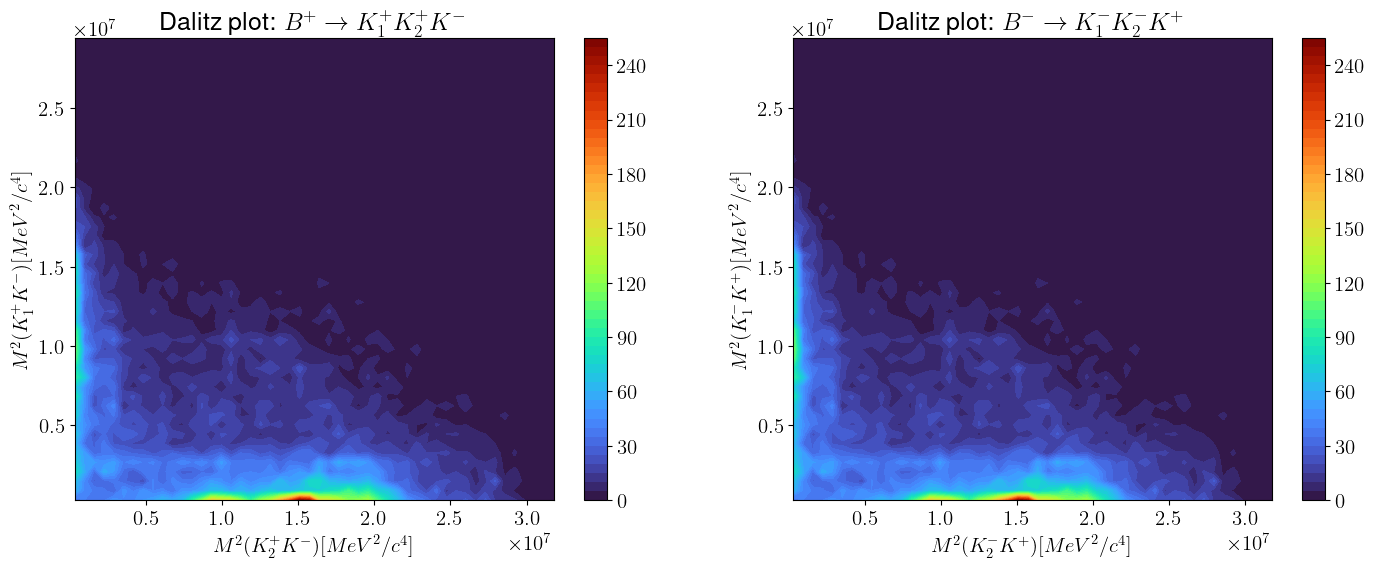

In [37]:
#Make the revised Dalitz plot here for B+ and B- mesons individually

Masses = invrt_mass(Bplus_events)

h_plus, xedges_plus, yedges_plus, _ =plt.hist2d(Masses[1], Masses[0], bins=50)
h_minus, xedges_minus, yedges_minus, _ =plt.hist2d(Masses[1], Masses[0], bins=50)
plt.close()

plt.subplots(2, 1, figsize=(17, 6))

plt.contourf((xedges[:-1]+xedges[1:])/2, (yedges[:-1]+yedges[1:])/2, h.T, levels=50)


plt.subplot(1, 2, 1)
plt.contourf((xedges_plus[:-1]+xedges_plus[1:])/2, (yedges_plus[:-1]+yedges_plus[1:])/2, h_plus.T, levels=50, cmap='turbo')
plt.title(r'Dalitz plot: $B^{+}\rightarrow K^{+}_1 K^{+}_2 K^{-}$')
plt.xlabel(r'$M^2(K^{+}_2 K^{-}) [{MeV}^2 / c^4]$')
plt.ylabel(r'$M^2(K^{+}_1 K^{-}) [{MeV}^2 / c^4]$')
plt.colorbar()


plt.subplot(1, 2, 2)
plt.contourf((xedges_minus[:-1]+xedges_minus[1:])/2, (yedges_minus[:-1]+yedges_minus[1:])/2, h_minus.T, levels=50, cmap='turbo')
plt.title(r'Dalitz plot: $B^{-}\rightarrow K^{-}_1 K^{-}_2 K^{+}$')
plt.xlabel(r'$M^2(K^{-}_2 K^{+}) [{MeV}^2 / c^4]$')
plt.ylabel(r'$M^2(K^{-}_1 K^{+}) [{MeV}^2 / c^4]$')
plt.colorbar()
plt.show()

In [38]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)

**I'm not sure the plot is correct, and I'm not certain of how to interpret it either to be honest.** 

**I have a feeling the invariant mass calculation doesn't apply for this type of decay**